In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install kneed
from kneed import KneeLocator
import seaborn as sns

# Exploratory Data Analysis

In [93]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/customer_classification_data.csv"
df = pd.read_csv(url)
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,Bachelor,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,High School,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,High School,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,High School,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,Bachelor,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Income                 500 non-null    float64
 1   Age                    500 non-null    int64  
 2   Education              500 non-null    object 
 3   Credit_Score           500 non-null    int64  
 4   Years_with_Bank        500 non-null    int64  
 5   Transaction_Count      500 non-null    int64  
 6   Balance                500 non-null    float64
 7   Loan_Approval_Amount   500 non-null    float64
 8   Credit_Card_Limit      500 non-null    float64
 9   Purchase_Frequency     500 non-null    float64
 10  Customer_Satisfaction  500 non-null    int64  
 11  Online_Activity        500 non-null    float64
dtypes: float64(6), int64(5), object(1)
memory usage: 47.0+ KB


In [95]:
df.describe()

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,62244.823110,40.010000,564.992000,10.806000,48.486000,5062.825191,25395.518396,10609.972452,0.512753,2.564000,0.494516
std,21881.731581,13.051229,159.206663,5.151061,28.742339,2926.414765,14257.083307,5572.250431,0.282915,1.101058,0.294468
min,25352.160710,18.000000,300.000000,1.000000,1.000000,44.900440,1087.318821,1017.345471,0.000813,1.000000,0.001320
25%,43586.942127,29.000000,426.000000,7.000000,25.000000,2563.861164,13254.375542,5788.708258,0.272196,2.000000,0.239926
50%,61513.145375,39.000000,562.000000,11.000000,48.000000,4962.940262,25523.286385,10716.457885,0.531370,3.000000,0.485326
75%,79805.933200,51.000000,692.000000,15.000000,72.000000,7575.192218,38359.706343,15530.730127,0.763411,4.000000,0.759197
max,99913.525490,64.000000,849.000000,19.000000,99.000000,9984.440444,49971.895230,19968.520560,0.993942,4.000000,0.999897


In [96]:
for col in df.columns:
    unique_values = df[col].unique()
    print(f"\nKolom: {col}")
    print(f"Jumlah unique values: {len(unique_values)}")
    print(unique_values[:10])  # tampilkan 10 pertama biar tidak terlalu panjang



Kolom: Income
Jumlah unique values: 500
[66161.01279 78639.20248 70207.25321 65866.23872 56774.10995 73442.05848
 57819.04084 91882.97506 97274.70704 53758.11391]

Kolom: Age
Jumlah unique values: 47
[57 60 46 42 36 21 62 37 63 18]

Kolom: Education
Jumlah unique values: 4
['Bachelor' 'High School' 'PhD' 'Master']

Kolom: Credit_Score
Jumlah unique values: 328
[503 779 519 834 410 768 430 420 651 484]

Kolom: Years_with_Bank
Jumlah unique values: 19
[ 1  2 14 17 12 15  9  4 10 18]

Kolom: Transaction_Count
Jumlah unique values: 98
[41 27 95 77 58 46 81 59 24 73]

Kolom: Balance
Jumlah unique values: 500
[1968.919899  9797.056371  7024.173403  7992.359261   538.6910419
 7226.574153  4836.263058  7949.263177  7160.577123  1764.187614 ]

Kolom: Loan_Approval_Amount
Jumlah unique values: 500
[ 2517.159284 31501.75884  16444.34158  45233.59294  48586.58248
 13968.14773  43456.20154  18869.30001  13426.76157  30247.50238 ]

Kolom: Credit_Card_Limit
Jumlah unique values: 500
[ 5813.3427    3

In [97]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Education'] = le.fit_transform(df['Education'])

df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,0,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,1,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,1,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,1,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,0,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


/tmp/ipython-input-526771963.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Customer_Satisfaction', data=df, palette='viridis')


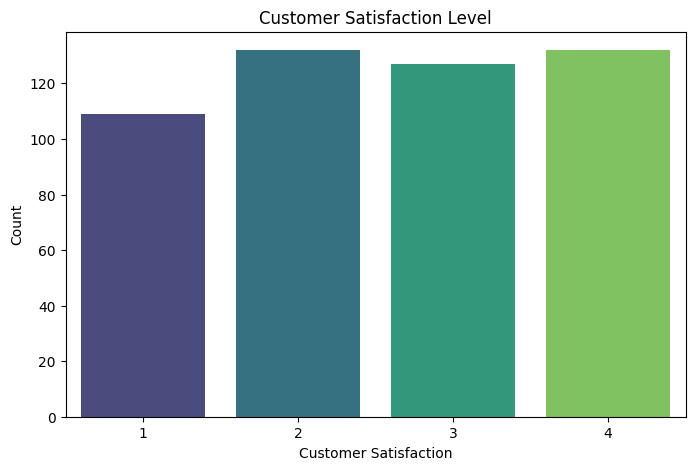

In [98]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Customer_Satisfaction', data=df, palette='viridis')
plt.title('Customer Satisfaction Level')
plt.xlabel('Customer Satisfaction')
plt.ylabel('Count')
plt.show()

most customers fall within higher satisfaction levels, implying that overall customer satisfaction with the service is positive.

/tmp/ipython-input-1776264012.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Education', y='Income', data=df, ci=None)


Text(0.5, 1.0, 'Average Income by Education Level')

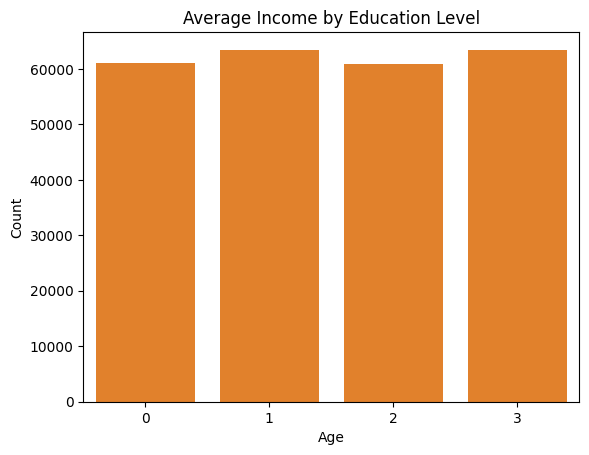

In [99]:
# Distribusi umur
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution of Customers')

# Rata-rata income per education level
sns.barplot(x='Education', y='Income', data=df, ci=None)
plt.title('Average Income by Education Level')


average income is relatively similar across all education levels, suggesting that education does not significantly impact earnings.

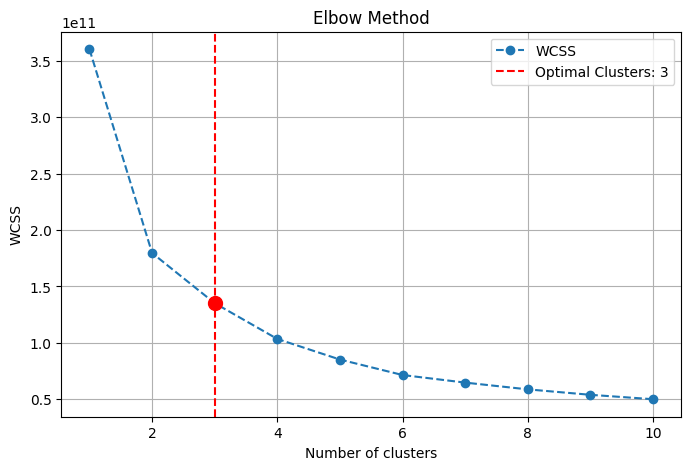

The optimal number of clusters is: 3


In [100]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score

Inertia (Unscaled): 31072943577.0065
Silhouette Score (Unscaled): 0.5429150974008692


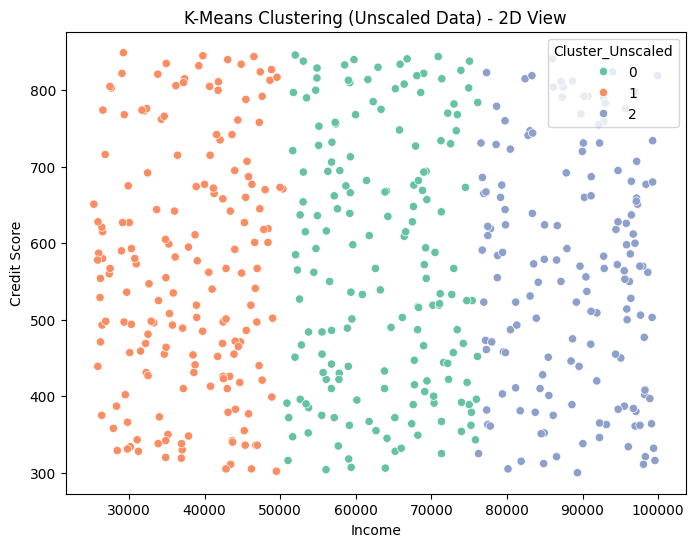

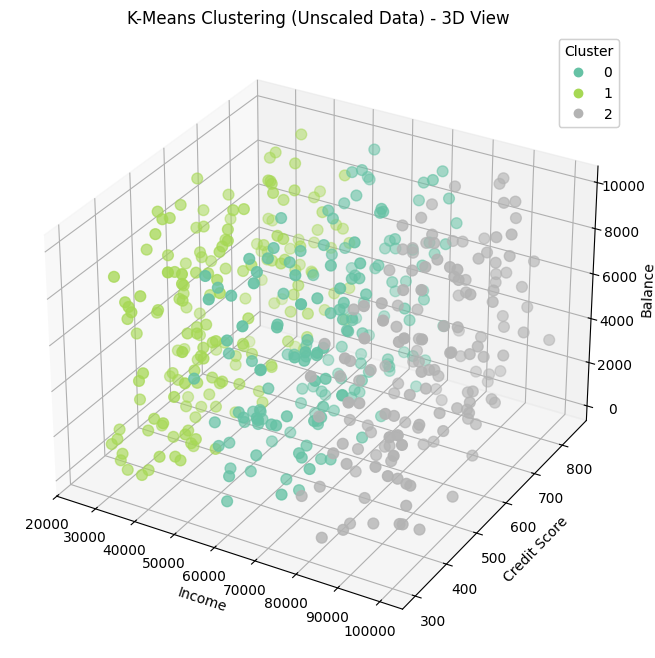

In [102]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D  # untuk 3D plotting

# --- Features
features = ['Income', 'Credit_Score', 'Balance', 'Customer_Satisfaction']
X = df[features]

# --- Build K-Means model (unscaled)
kmeans_unscaled = KMeans(n_clusters=3, random_state=42)
df['Cluster_Unscaled'] = kmeans_unscaled.fit_predict(X)

# --- Evaluate cluster quality
inertia_unscaled = kmeans_unscaled.inertia_
sil_unscaled = silhouette_score(X, df['Cluster_Unscaled'])

print("Inertia (Unscaled):", inertia_unscaled)
print("Silhouette Score (Unscaled):", sil_unscaled)

# --- 2D Cluster Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x='Income', y='Credit_Score', hue='Cluster_Unscaled', data=df, palette='Set2')
plt.title('K-Means Clustering (Unscaled Data) - 2D View')
plt.xlabel('Income')
plt.ylabel('Credit Score')
plt.show()

# --- 3D Cluster Visualization
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot 3D
scatter = ax.scatter(
    df['Income'],
    df['Credit_Score'],
    df['Balance'],
    c=df['Cluster_Unscaled'],
    cmap='Set2',
    s=60
)

# Label axes
ax.set_xlabel('Income')
ax.set_ylabel('Credit Score')
ax.set_zlabel('Balance')
ax.set_title('K-Means Clustering (Unscaled Data) - 3D View')

# Tambahkan legend
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend1)

plt.show()


Inertia (Scaled): 1361.0126125347788
Silhouette Score (Scaled): 0.18670331621843378


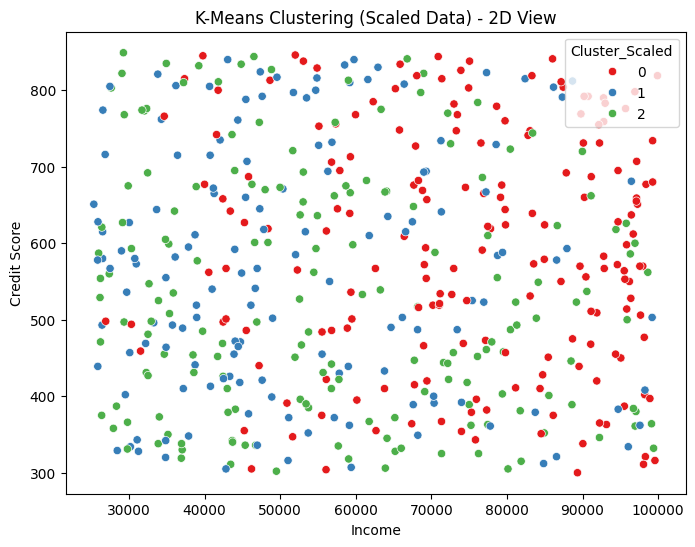

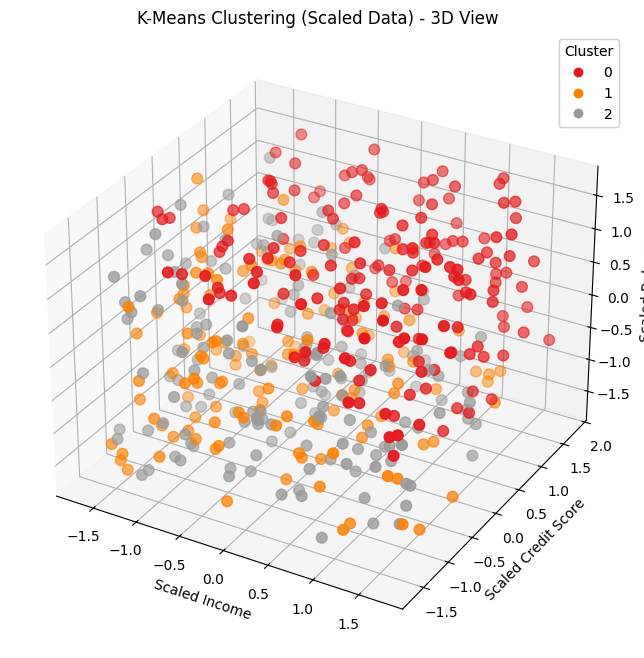

In [103]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# --- Features
features = ['Income', 'Credit_Score', 'Balance', 'Customer_Satisfaction']
X = df[features]

# --- Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Build K-Means model (scaled)
kmeans_scaled = KMeans(n_clusters=3, random_state=42)
df['Cluster_Scaled'] = kmeans_scaled.fit_predict(X_scaled)

# --- Evaluate cluster quality
inertia_scaled = kmeans_scaled.inertia_
sil_scaled = silhouette_score(X_scaled, df['Cluster_Scaled'])

print("Inertia (Scaled):", inertia_scaled)
print("Silhouette Score (Scaled):", sil_scaled)

# --- 2D Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x='Income', y='Credit_Score', hue='Cluster_Scaled', data=df, palette='Set1')
plt.title('K-Means Clustering (Scaled Data) - 2D View')
plt.xlabel('Income')
plt.ylabel('Credit Score')
plt.show()

# --- 3D Visualization
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_scaled[:, 0],   # Scaled Income
    X_scaled[:, 1],   # Scaled Credit Score
    X_scaled[:, 2],   # Scaled Balance
    c=df['Cluster_Scaled'],
    cmap='Set1',
    s=60
)

ax.set_xlabel('Scaled Income')
ax.set_ylabel('Scaled Credit Score')
ax.set_zlabel('Scaled Balance')
ax.set_title('K-Means Clustering (Scaled Data) - 3D View')

legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend1)

plt.show()


Inertia (Unscaled): 31072943577.0065

Silhouette Score (Unscaled): 0.5429150974008692

Inertia (Scaled): 1361.0126125347788

Silhouette Score (Scaled): 0.18670331621843378

In [104]:
# Build final K-Means model
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
df['KMeans_Cluster'] = kmeans_final.fit_predict(X)

# Lihat hasil cluster awal
df[['Income', 'Credit_Score', 'Balance', 'Customer_Satisfaction', 'KMeans_Cluster']].head()


,Income,Credit_Score,Balance,Customer_Satisfaction,KMeans_Cluster
0,66161.01279,503,1968.919899,1,0
1,78639.20248,779,9797.056371,2,0
2,70207.25321,519,7024.173403,3,0
3,65866.23872,834,7992.359261,4,0
4,56774.10995,410,538.691042,4,1


In [105]:
# Lihat berapa banyak data di tiap cluster
print(df['Cluster_Unscaled'].value_counts())

# Lihat rata-rata karakteristik tiap cluster
cluster_summary = df.groupby('Cluster_Unscaled')[features].mean()
print(cluster_summary)


Cluster_Unscaled
1    176
0    170
2    154
Name: count, dtype: int64
                        Income  Credit_Score      Balance  \
Cluster_Unscaled                                            
0                 63477.548162    571.217647  4983.103428   
1                 37915.678457    562.534091  4895.139520   
2                 88688.759473    560.928571  5342.470501   

                  Customer_Satisfaction  
Cluster_Unscaled                         
0                              2.588235  
1                              2.494318  
2                              2.616883  


In [106]:
# Lihat berapa banyak data di tiap cluster
print(df['Cluster_Scaled'].value_counts())

# Lihat rata-rata karakteristik tiap cluster
cluster_summary = df.groupby('Cluster_Scaled')[features].mean()
print(cluster_summary)

Cluster_Scaled
0    183
2    172
1    145
Name: count, dtype: int64
                      Income  Credit_Score      Balance  Customer_Satisfaction
Cluster_Scaled                                                                
0               74697.863512    593.896175  7729.689792               2.426230
1               52557.893302    566.496552  3404.193102               1.510345
2               57161.674439    532.970930  3623.670719               3.598837


**-SUMMARY-**

The **unscaled model is better**, because the Silhouette Score is higher **(0.54)** → meaning the clusters are more separated and homogeneous within them.

*   Cluster 0: Maintain loyalty with a light reward system and service improvements. A referral program can be offered.(“Mid-range stable customers”)
*   Cluster 1: Focus on price-sensitive campaigns, promo bundling, and improving customer service to drive satisfaction.(“Low-income, low satisfaction”)
*   Cluster 2: Create premium programs, exclusive access, and personalized offers to keep them loyal. Prioritize retention and upselling.(“High-income, strong spender”)



